In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv(r'C:\Users\Crist\RossmanStores\Rossmann-Store-Sales-Project\data\rossmann_data.csv')

In [2]:
df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,competition_months_open
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,no,1,82
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,no,1,82
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,no,1,82
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,no,1,82
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,no,1,82


In [3]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [4]:
df.CompetitionDistance.describe()

count   1014567.00
mean       5430.09
std        7715.32
min          20.00
25%         710.00
50%        2330.00
75%        6890.00
max       75860.00
Name: CompetitionDistance, dtype: float64

In [5]:
df.loc[df.CompetitionDistance < 6890,'CompetitionDistance'].plot.hist()

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import numpy as np
df.StoreType.unique()
grouped = df.groupby(['StoreType','Assortment'],as_index=False)

In [7]:
df.StoreType.unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [8]:
df.Assortment.unique()

array(['a', 'c', 'b'], dtype=object)

In [18]:
store_combo = grouped.Sales.agg(np.mean)

In [28]:
store_combo

,StoreType,Assortment,Sales
0,a,a,5398.86
1,a,c,6323.40
2,b,a,10821.62
3,b,b,8553.93
4,b,c,17969.56
5,c,a,5647.17
6,c,c,5805.78
7,d,a,5321.84
8,d,c,5826.41


In [31]:
store_combo

,StoreType,Assortment,Sales
0,a,a,5398.86
1,a,c,6323.40
2,b,a,10821.62
3,b,b,8553.93
4,b,c,17969.56
5,c,a,5647.17
6,c,c,5805.78
7,d,a,5321.84
8,d,c,5826.41


In [87]:
store_combo['store_kind'] = store_combo['StoreType'].astype(str) +','+ store_combo['Assortment'].astype(str)

In [88]:
store_combo.store_kind = store_combo['store_kind'].astype('category')

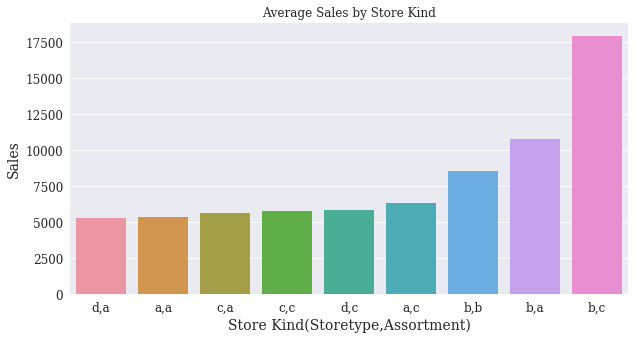

In [89]:
import seaborn as sns
plt.figure(figsize = (10,5))
result = store_combo.groupby(['store_kind'])['Sales'].aggregate(np.median).reset_index().sort_values('Sales')
fig = sns.barplot(x='store_kind',y='Sales',data=store_combo,order=result['store_kind'])
plt.rc('font',family='serif')
plt.rc('xtick',labelsize='large')
plt.rc('ytick',labelsize='large')
fig.yaxis.label.set_size(14)
fig.xaxis.label.set_size(14)
fig.set_xlabel('Store Kind(Storetype,Assortment)')
fig.set_title('Average Sales by Store Kind')
plt.show()

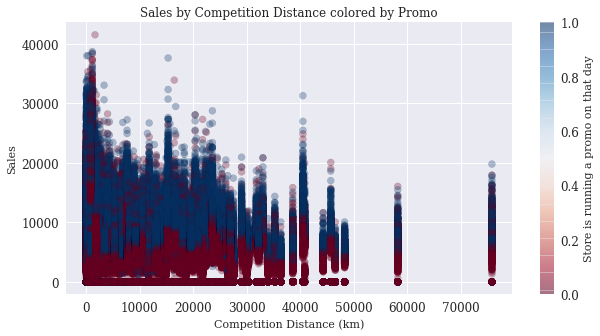

In [86]:
fig1 = plt.figure(figsize = (10,5))
ax1 = fig1.add_subplot(1,1,1)
mychart = ax1.scatter(df.CompetitionDistance,df.Sales,c = df.Promo,
                     cmap='RdBu',alpha =.3)
fig1.colorbar(mychart,ax=ax1,label='Store is running a promo on that day')
plt.rc('font',family='serif')
plt.rc('xtick',labelsize='large')
plt.rc('ytick',labelsize='large')
plt.xlabel('Competition Distance (km)')
plt.ylabel('Sales')
plt.title('Sales by Competition Distance colored by Promo')
plt.show()

In [83]:
df.groupby('Promo')['Sales'].agg(np.mean)

Promo
0   4408.96
1   7994.87
Name: Sales, dtype: float64

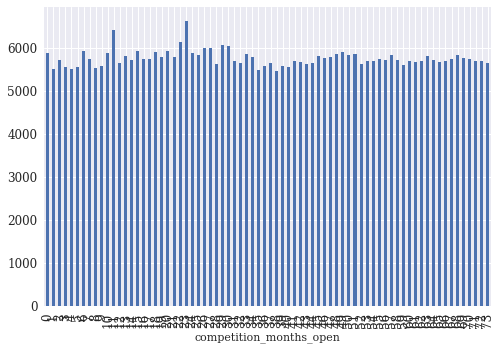

In [81]:
df.loc[df.competition_months_open<74].groupby('competition_months_open')['Sales'].agg(np.mean).plot(kind='bar')